# Project 5 - Image segmentation with histogram thresholding

Image segmentation = decomposing the image in its composing parts.

Thus each pixel will get a label that says to which object (or class of objects) that pixel belongs to.

## 1. Histograms
The simplest definition of a histogram is that it is a function which shows how often each grayscale value appears in an image.

<img src="media/hist.png"><center>A grayscale image and its histogram</center>

In order to use histogram segmentation the objects and the background need to have different grayscale values. After the histogram is displayed, a set of thresholds need to be decided in order to separate the objects and background.
<img src="media/levels.png"><center>The correspondence between different objects of an image and the background.</center>

## 2. Histogram thresholding: binarization

If the histogram has 2 dominant modes, they can be separated (thus the objects can be identified) by choosing a gray level $T$, called a threshold. This threshold is chosen in the global minimum of the histogram. Given the initial gray level image $f$, we build a new labeled image $g$ using: </br>
$g(m,n)=\left\{{E_{0},0\leq f(m,n)<T \\ E_{1},T\leq f(m,n)<L}
\right.$

The labeled image will have 2 labels: $E_{0}$ for the pixels that have a gray level lower than the threshold  $T$ and $E_{1}$ for the pixels that have a gray level higher or equal to the threshold $T$. The labels $E_{0}$ and $E_{1}$ can have numerical values (0 and 1, or 0 and 255) or can be strings of characters. This is called binarization because the resulting image has only 2 values. We will use numerical labels. 

## 3. Evaluating the segmentation quality 
One way to measure the quality of the segmentation operation is to check the correctness of the segmentation decision at pixel level, for test images, in which pixels belonging to certain classes of objects are known (thus having example images for a segmentation ideal). Thus we can identify the number of correctly segmented pixels (TP, true positives), as well as the two types of errors: pixels of the foreground (object) which were declared as background (FN, false negatives) and pixels from background that were declared as object (FP, false positives). Obviously, this kind of measure refers to the segmentation of a single category of objects in the image (a single class - the foregraound), all the rest of the image being considered background; if segmentation characterization is desired for an image that contains several classes, the evaluation process is performed for each class and then consider the average values at the level of the whole image.

The basic measures (TP, FN, FP) are, obviously, absolute measures. In order to make them relative, some normalizations are required. The most used normalizes measures are precision and recall. They both have values in the range $[0; 1]$ and are ascending with the segmentation quality. Precision is the percent of the segmented pixels that are correctly segmented:</br>
$PREC = \frac{TP}{TP + FP}$</br>
Recall is the percent of the segmented pixels from the total number of pixels that need to be segmented:</br>
$REC = \frac{TP}{TP + FN}$</br>

### There is need of a correctly segmented image (mask) as refference!

## 4. Exercises

Exercise 1. You have 2 images: one is given by the segmentation method (Segm) and one is the ideal labeled image (Mask) as given in the code below. Write a script that computes the quality measures: TP, FP, FN, Precision and Recall. Print each value.

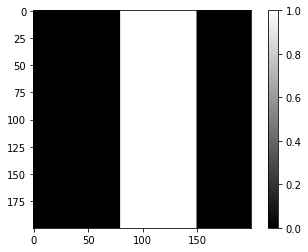

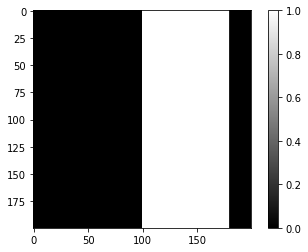

TP: 30000  FN: 4000  FP: 6000
 prec:0.8333333333333334  recall:0.8823529411764706


In [5]:
import numpy as np
import matplotlib.pyplot as plt

Mask = np.zeros([200,200])
Mask[:,80:150] = 1
plt.figure(), plt.imshow(Mask, cmap='gray'), plt.colorbar(), plt.show()
Segm = np.zeros([200,200])
Segm[:,100:180] = 1
plt.figure(), plt.imshow(Segm, cmap='gray'), plt.colorbar(), plt.show()


 ## Calculate TP,FP,FN
## Object=> white , foregrond=> black
## 

TP=0
FN=0
FP=0

for i in range(Mask.shape[0]):
    for j in range(Mask.shape[1]):
        if Mask[i,j]==Segm[i,j]:
            TP+=1
        elif Mask[i,j]==1 and Segm[i,j]==0:
            FN+=1
        elif Mask[i,j]==0 and Segm[i,j]==1:
            FP+=1
print('TP: {}  FN: {}  FP: {}'.format(TP,FN,FP))
prec=TP/(TP+FP)
recall=TP/(TP+FN)
print(' prec:{}  recall:{}'.format(prec,recall))
            
            
        

Exercise 2: Make a test image that contains a square with a gray level of 100 on a uniform background with a gray level of 180 (see exercise 1 for exemple). Add gaussian noise to it with a standard deviation of 10 and, separately, a standard deviation of 30. Compute the precision and recall when you vary the segmentation threshold for both cases of noise power. Print and comment the results.

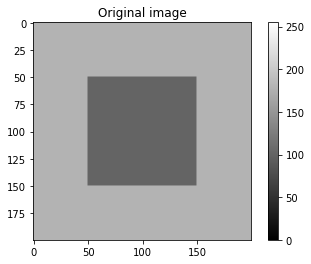

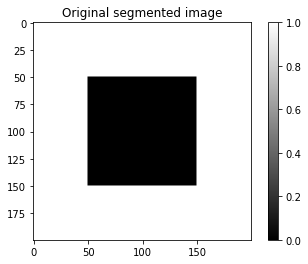

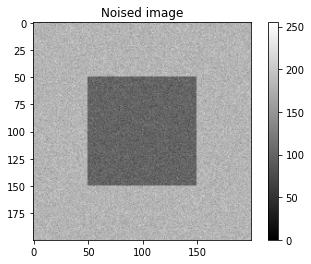

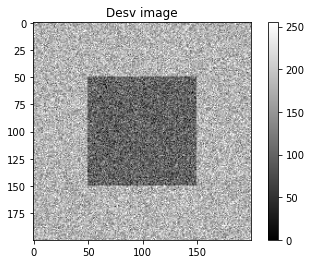

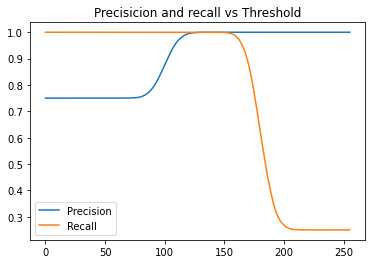

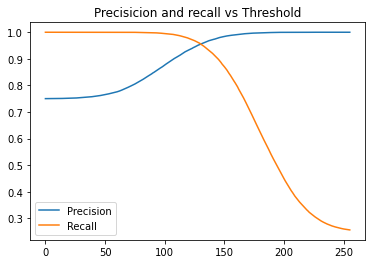

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# Original image
img = np.zeros([200,200])
img[:,:]=180
img[50:150,50:150]=100

plt.figure(), plt.imshow(img, cmap='gray',vmin=0,vmax=255), plt.colorbar(),plt.title('Original image'), plt.show()

# Segmented original image
img_segm= np.ones([200,200])
img_segm[50:150,50:150]=0

plt.figure(), plt.imshow(img_segm, cmap='gray'), plt.colorbar(),plt.title('Original segmented image'), plt.show()
# Adding noise

N=sigma = 10
N=np.random.normal(0, sigma, img.shape)
img_noise=np.copy(img)
img_noise=img_noise+N
plt.figure(), plt.imshow(img_noise, cmap='gray',vmin=0,vmax=255), plt.colorbar(),plt.title('Noised image'), plt.show()


# With additional sigma seviation
img_desv=np.copy(img)
img_desv=np.random.normal(img_noise, 30, img.shape)
plt.figure(), plt.imshow(img_desv, cmap='gray',vmin=0,vmax=255), plt.colorbar(),plt.title('Desv image'), plt.show()



def compare_threshold(img,img_org):
    thresholds=np.linspace(0,255,256)
    prec=[]
    recall=[]
    for threshold in thresholds:
        TP=0
        FN=0
        FP=0
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                
                if img[i,j]>threshold: # is objet
                    segm_pixel=1
                    #print('mayor')
                else: # is background
                    segm_pixel=0
                    #print(menor)
                    
                
                if segm_pixel==img_org[i,j]:
                    #print('bien')
                    TP+=1
                elif img_org[i,j]==1 and segm_pixel==0:
                    FN+=1
                    #print('FN')
                elif img_org[i,j]==0 and segm_pixel==1:
                    FP+=1
                    #print('FP')

        prec.append(TP/(TP+FP))
        recall.append(TP/(TP+FN))
    
    plt.figure()
    plt.plot(thresholds,prec,thresholds,recall)
    plt.title('Precisicion and recall vs Threshold')
    plt.legend(['Precision','Recall'])
    #print(prec)
    #print(recall)
    
compare_threshold(img_noise,img_segm)
compare_threshold(img_desv,img_segm)

# We can see 3 regions:
    # The first one with recall =1 and precision low, the threshold is too low ,so we are segmentated all pixels as white 
    # meaning that TP= white pixels, FN=0 and FP= black pixels, so recall=1, precision=white pixels / total pixels
    
    # In the second region we can see how the precision grow until the two are 1. That is because the theshold is in the 
    # variance zone on the noise, so now all white pixels are segmented as white (FN=0,recal=1) , but black ones could be segmented as 
    # white depending of the noise. This growing zone will achive precision=1,recall=1 , when the threshold is in a zone , 
    # where background +- noise < threshold  < foreground +- noise
    
    # In the last region , the threshold is too big so it will take all pixels as black , so TP=black pixels 
    # FN= white pixels FP=0 recall= black pixels /total pixels , precision= 1 
        
        
                    
        
    

